# Neural & Behavioral Modeling - Week 9 (Examples)
by Tsung-Ren (Tren) Huang (tren.huang@gmail.com)

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *
from time import sleep

## 1 Neural Computation

### 1.1 Pattern Recognition

In [2]:
RETINA=matrix('0 0 0 0 0;0 0 1 0 0;0 1 1 1 0')
LGN_RF=matrix('0;-0.5;1;-0.5;0')
LGN_RESPONSE=RETINA*LGN_RF
print(LGN_RESPONSE)

[[ 0.]
 [ 1.]
 [ 0.]]


### 1.2 Perceptron w/o learning

-1
-1
1
1
1


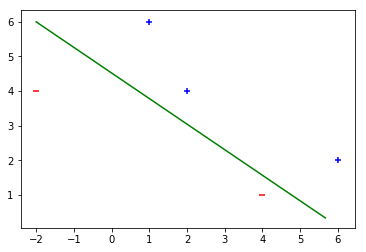

In [3]:
X = array([   #[x1,x2,bias]
    [-2,4, -1], 
    [4,1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

y = array([-1,-1,1,1,1])

# The hyperplane:
w=[2, 3, 13] # w0x0+w1x1-w2=0 => x1=(w2-w0x0)/w1
p1=(w[2]-w[0]*(-2))/w[1] # point 1 of the hyperplane: (-2, p1)
p2=(w[2]-w[0]*6)/w[1] # point 2 of the hyperplane: (6, p2)

# Testing:
for i, x in enumerate(X):
    print(sign(dot(X[i], w)))
    
# Ploting:
for i, x in enumerate(X): # samples
    if(i<2): scatter(x[0],x[1],marker='_',color='r')
    else: scatter(x[0],x[1],marker='+',color='b')
plot([-2,p1],[6,p2],'g'); # the hyperplane

## 2 Unsupervised Learning

### 2.1 Hopfield Network

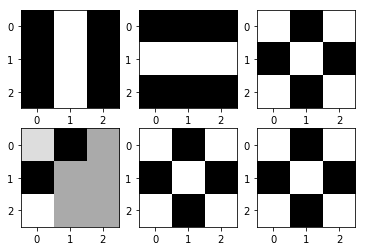

In [4]:
p=array([
    [-1,1,-1,-1,1,-1,-1,1,-1], # 3x3 pattern 1
    [-1,-1,-1,1,1,1,-1,-1,-1], # 3x3 pattern 2
    [1,-1,1,-1,1,-1,1,-1,1],   # 3x3 pattern 3
])

w=zeros([9,9]);
for i in range(3):
    subplot(2,3,i+1);
    imshow(p[i].reshape((3,3)),cmap='gray')
    w=w+outer(p[i],p[i]); # learning

# Retrieval cue:
subplot(2,3,4)
cue=array([0.3,-1,0,-1,0,0,0.5,0,0])
imshow(cue.reshape((3,3)),cmap='gray')

# Recalling:
for t in [2,3]:
    subplot(2,3,t+3);
    recall=matmul(w,cue)>0
    imshow(recall.reshape((3,3)),cmap='gray')

### 2.2 Instar/OutStar Learning

In [5]:
x=array([0,1,0])
W1=random.rand(3); W2=random.rand(3)
for i in range(10): # trials 
    y=dot(W1,x) # Bottom-up F1→F2
    W1+=y*(x-W1) # Postsynaptically gated InStar 
    W2+=y*(x-W2) # Presynaptically gated OutStar 
    x2=dot(W2,y) # Top-down F2→F1
    print(W1,y)

[ 0.16758495  0.358417    0.67058822] 0.199011235611
[ 0.10751966  0.58837125  0.430238  ] 0.358416999323
[ 0.04425818  0.83056177  0.17709833] 0.588371253242
[ 0.00749903  0.97129069  0.03000723] 0.830561774843
[  2.15291927e-04   9.99175775e-01   8.61486836e-04] 0.971290687856
[  1.77448903e-07   9.99999321e-01   7.10058646e-07] 0.999175775396
[  1.20549238e-13   1.00000000e+00   4.82375641e-13] 0.999999320654
[  5.56367819e-26   1.00000000e+00   2.22648102e-25] 1.0
[ 0.  1.  0.] 1.0
[ 0.  1.  0.] 1.0


### 2.3 Self-Organizing Map (Buggy)

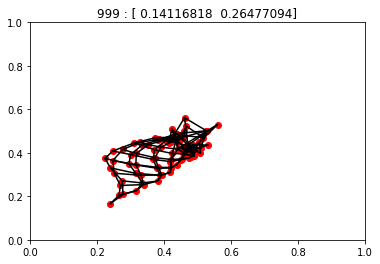

In [6]:
# 2D Kohonen SOM:
nn=10 # 10x10 neurons
lmbda=0.2 # learning rate
sig=4.0 # sigma of the neighbor function
[X,Y]=meshgrid(range(1,nn+1),range(1,nn+1)) # topoical coordiates (x,y) of neurons

# Initial preferred features (x,y)=(c1,c2):
c1=0.5-.1*(2*random.rand(nn,nn)-1); # Xs of 10x10 neurons
c2=0.5-.1*(2*random.rand(nn,nn)-1); # Ys of 10x10 neurons

# Training:
for t in range(1000):
    x=0.5*random.rand(2) # stimuli ranged in [0,0.5]x[0,0.5]
    r=exp(-(c1-x[0])**2-(c2-x[1])**2); # neurons' responses to stimuli
    xy=where(r==amax(r)) # who is the winner
    r=exp(-((X-xy[0][0])**2+(Y-xy[1][0])**2)/sig) # topological neighborhood function
    c1=c1+lmbda*r*(x[0]-c1); # Kohonen learning of inputs' Xs
    c2=c2+lmbda*r*(x[1]-c2); # Kohonen learning of inputs' Ys
                                                         
clf() # clear previous figure
plot(c1,c2,'ro'); plot(c1,c2,'k'); plot(c1.T,c2.T,'k');
axis([0,1,0,1]); title(str(t)+' : '+str(x))
display(gcf()); clear_output(wait=True) # to allow dynamic plots

## 3. Supervised Learning

### 3.1 Delta Rule (Not ported from Matlab to Python yet)

In [7]:
% this script trains a two-layered network of units
% with the squashing activation funciton to associate 
% patterns using the delta rule 

InPat=[1 0 0 0;1 0 0 0;1 1 0 0;0 0 1 0;0 0 0 1;0 0 1 1];
DesOut=[1 0;1 0;1 0;0 1;0 1;0 1];

a=1; % set the learning rate
tol=0.1; % set the tolerance
nIts=100000; % set the maximum number of allowed iterations
[nPat,nIn]=size(InPat); % find numbers of patterns and inputs 
[nPat,nOut]=size(DesOut); % find numbers of patterns and outputs 
W=rand(nOut,nIn)*2-1; % set initially random connectivity matrix
maxErr=10; % set the maximum error to an initially high value

for c=1:nIts, % for each learning iteration
   pIndx=ceil(rand*nPat); % choose pattern pair at random
   d=DesOut(pIndx,:)'; % set desired output d to chosen output
   x=InPat(pIndx,:)'; % set input x to chosen input pattern
   q=W*x; % find the weighted sum q of the inputs
   y=1./(1+exp(-q)); % squash that to compute the output y
   dy=y.*(1-y); % compute the derivative of the squashing function
   e=d-y; % find the error e for the chosen input
   g=e.*dy; % find output error signal g
   deltaW=a*g*x'; % compute delta rule weight update  
   W=W+deltaW;  % apply the weight update
   if rem(c,(5*nPat))==0, % after several updates check maximum error
      Q=(W*InPat')'; % compute the weighted input sum for all patterns
      Out=1./(1+exp(-Q)); % squash to compute output for all patterns
      maxErr=max(abs(DesOut-Out)); % find max error over all patterns
   end % end the check
   if maxErr<tol, break, end % break if max error is below tolerance
end % end learning loop

Out

SyntaxError: invalid syntax (<ipython-input-7-4e1bf18f391a>, line 5)

### 3.2 Perceptron w/ learning


-1.0
-1.0
1.0
1.0
1.0


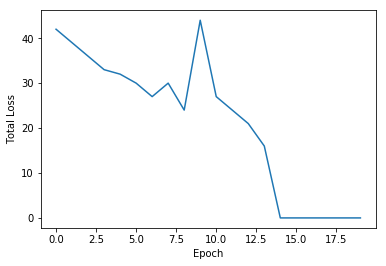

In [7]:
# Supporting function: -----------------------
def sgd(X, Y): # Stochastic Gradient Descent
    w = zeros(len(X[0]))
    eta = 1
    epochs = 20
    errors = []
    for t in range(epochs):
        total_error = 0
        for i, x in enumerate(X):
            if (dot(X[i], w)*Y[i]) <= 0:
                total_error += (np.dot(X[i], w)*Y[i])
                w = w + eta*X[i]*Y[i]
        errors.append(total_error*-1)
    plot(errors); xlabel('Epoch'); ylabel('Total Loss')
    return w
#----------------------------------------------

X = array([   #[x1,x2,bias]
    [-2,4, -1], 
    [4,1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

y = array([-1,-1,1,1,1])
# Learning:
w = sgd(X,y)

# Testing:
for i, x in enumerate(X):
    print(sign(dot(X[i], w))) 

### 3.3 Backpropagation (Not ported from Matlab to Python yet)

In [ ]:
% this script trains a three-layered network of units
% with the squashing activation funciton to associate 
% patterns using backpropagation

InPat=[1 0 0 0;1 0 0 0;1 1 0 0;0 0 1 0;0 0 0 1;0 0 1 1];
DesOut=[1 0;1 0;1 0;0 1;0 1;0 1];

a=0.1; % set the learning rate
tol=0.1; % set the tolerance
b=1; % set the bias
nIts=100000; % set the maximum number of allowed iterations
nHid=1; % set the number of hidden units
[nPat,nIn]=size(InPat); % find number of patterns and number of inputs 
[nPat,nOut]=size(DesOut); % find number of patterns and number of outputs 
V=rand(nHid,nIn+1)*2-1; % set initial input-hidden connectivity matrix
U=rand(nOut,nHid+1)*2-1; % set initial hidden-output connectivity matrix
deltaV=zeros(nHid,nIn+1); % define input-hidden change matrices
deltaU=zeros(nOut,nHid+1); % define hidden-output change matrices
maxErr=10; % set the maximum error to an initially high value

for c=1:nIts, % for each learning iteration
    pIndx=ceil(rand*nPat); % choose pattern pair at random
    d=DesOut(pIndx,:); % set desired output to chosen output
    x=[InPat(pIndx,:) b]'; % append the bias to the input vector
    y=1./(1+exp(-V*x)); % compute the hidden unit response
    y=[y' b]'; % append the bias to the hidden unit vector
    z=1./(1+exp(-U*y)); % compute the output unit response
    e=d-z'; % find the error vector
    if max(abs(e))>tol, % train if any error exceeds tolerance
        x=x';y=y';z=z'; % convert column to row vectors
        zg=e.*(z.*(1-z)); % compute the output error signal
        yg=(y.*(1-y)).*(zg*U); % compute hidden error signal
        deltaU=a*zg'*y; % compute the change in hidden-output weights
        deltaV=a*yg(1:nHid)'*x; % compute change in input-hidden weights
        U=U+deltaU; % update the hidden-output weights
        V=V+deltaV; % update the input-hidden weights
     end % end the training conditional
    if rem(c,(5*nPat))==0, % every so often check network performance
        Inb=[InPat b*ones(nPat,1)]; % append bias to all input patterns
        Hid=(1./(1+exp(-V*Inb')))'; % find hid response to all patterns
        Hidb=[Hid b*ones(nPat,1)]; % append bias to all hidden vectors
        Out=(1./(1+exp(-U*Hidb')))'; % find out response to all patterns
        maxErr=max(abs(abs(DesOut-Out))); % max error over all patterns
    end % end check conditional
    if maxErr<tol, break, end, % break if all errors within tolerance
end % end training loop

Out

## 4. Reinforcement Learning

### 4.1 Temporal difference learning (Not ported from Matlab to Python yet)

In [ ]:
% this script simulates the DA neuron response

clear all;close all;
a=0.3; % set learning rate
r=0.9; % temporal discounting
nTrials=200; % set number of trials
nTimes=50; % set number of time steps per trial
qTime=15; % set time of cue
rTime=25; % set time of reward

X=zeros(1,nTimes); % input vector 
X(qTime:rTime-1)=1; % binary status: 0=None; 1=Yes
%X(qTime)=1; % need memory trace to work
R=zeros(1,nTimes);  % reward vector
R(rTime)=1; % binary status: 0=None; 1=Yes
V=zeros(1,nTimes); % value function V(X(t))
TDe=zeros(1,nTimes); % define prediction unit vector
Tcourse=zeros(nTrials,nTimes); % define time course hold array

for c=1:nTrials, % for each learning trial
    if c==nTrials/2, R(rTime)=0; end % remove reward for later trials
    for t=2:nTimes
        TDe(t)=R(t)+r*V(t)-V(t-1); % TD error
        V(t-1)=V(t-1)+a*X(t-1)*TDe(t); % TD learning: V(X(t))
        %V(t-1)=V(t-1)+a*TDe(t); % TD learning: V(t)
    end
    T_V(c,:)=V;%TDe; % save learned V(t) across trials
    T_TDe(c,:)=TDe; % save learned TDe(t) across trials
end % end learning trial loop

% plot out results
figure(1);
mesh(T_V);view([0,90]);
set(gca,'linewidth',2);
set(gca,'fontsize',20,'fontweight','bold');
xlabel('Time Step');ylabel('trial');
zlabel('Anticipated Reward: V(t,x)');
title('Anticipated Reward: V(t,x)');
figure(2);
mesh(T_TDe);view([0,90]);
set(gca,'linewidth',2);
set(gca,'fontsize',20,'fontweight','bold');
xlabel('Time Step');ylabel('Trial')
zlabel('TD error: TDe(t)');
title('TD error: TDe(t)');

### 4.2 Q Learning (Not implemented yet)